## 1) Import necessary libraries

In [11]:
# code here

import pandas as pd



## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [12]:
# code here

# Specify the file path to your dataset
file_path = 'cs412_hw1_dataset.csv'

# Read the .csv file into a DataFrame
training_data = pd.read_csv(file_path)


## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)


In [13]:
# code here

# Understanding the Dataset
# Find the shape of the dataset (number of samples & number of attributes)
dataset_shape = training_data.shape
print(f"Dataset Shape: {dataset_shape}")

# Display variable names (both dependent and independent)
dependent_variable = 'health_metrics'
independent_variables = training_data.columns.tolist()
independent_variables.remove(dependent_variable)
print(f"Dependent Variable: {dependent_variable}")
print(f"Independent Variables: {independent_variables}")

# Display the summary of the dataset
dataset_summary = training_data.info()

# Display the first 5 rows from the training dataset
first_5_rows = training_data.head()





Dataset Shape: (3430, 11)
Dependent Variable: health_metrics
Independent Variables: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'diet', 'life_stage', 'year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3182 non-null   object 
 1   island             3388 non-null   object 
 2   bill_length_mm     3240 non-null   float64
 3   bill_depth_mm      3167 non-null   float64
 4   flipper_length_mm  3219 non-null   float64
 5   body_mass_g        3200 non-null   float64
 6   sex                3179 non-null   object 
 7   diet               3163 non-null   object 
 8   life_stage         3361 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3387 non-null   float64
dtypes: float64(5), object(6)
memory usage: 294.9+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder


sex_map = {'female':1, 'male': 0}

island_map = {'Biscoe': 1,
              'Dream': 2,
              'Torgensen': 3}

diet_map = {'fish': 1,
              'krill': 2,
              'squid': 3,
            "parental":4}

life_stage_map = {'chick': 1,
              'juvenile': 2,
              'adult': 3}

health_metrics_map = {'healthy': 1,
              'overweight': 2,
              'underweight': 3}

# code here

# Preprocessing
# Check for missing values in the dataset
missing_values = training_data.isnull().sum()
print(f"Missing Values:\n{missing_values}")

# Fill missing values with the most common values in corresponding rows
for column in missing_values.index:
    if missing_values[column] > 0:
        most_common_value = training_data[column].mode()[0]
        training_data[column].fillna(most_common_value, inplace=True)

# Verify that missing values have been filled
updated_missing_values = training_data.isnull().sum()
print(f"\nUpdated Missing Values:\n{updated_missing_values}")


training_data['sex'] = training_data['sex'].map(sex_map)
training_data['island'] = training_data['island'].map(island_map)
training_data['diet'] = training_data['diet'].map(diet_map)
training_data['life_stage'] = training_data['life_stage'].map(life_stage_map)
training_data['health_metrics'] = training_data['health_metrics'].map(health_metrics_map)

# Encoding the 'species' column
label_encoder = LabelEncoder()
training_data['species'] = label_encoder.fit_transform(training_data['species'])

# Display the updated dataset after encoding
print("Updated Dataset:")
print(training_data.head())




Missing Values:
species              248
island                42
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                  251
diet                 267
life_stage            69
health_metrics         0
year                  43
dtype: int64

Updated Missing Values:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64
Updated Dataset:
   species  island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0        0       1            53.4           17.8              219.0  \
1        0       1            49.3           18.1              245.0   
2        0       1            55.7           16.6              226.0   
3        0       1            38.0           15.6              221.0   
4        0       1          

## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# Shuffle the dataset to randomize the order of rows
training_data = shuffle(training_data, random_state=42)

# Separate the dependent variable (y) and independent variables (X)
X = training_data.drop(columns=['health_metrics'])
y = training_data['health_metrics']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


Correlations with Health Metrics:
health_metrics       1.000000
life_stage           0.129573
flipper_length_mm    0.091418
bill_depth_mm        0.056337
bill_length_mm       0.040724
body_mass_g          0.019261
year                -0.000750
species             -0.006497
island              -0.022867
sex                 -0.053031
diet                -0.172632
Name: health_metrics, dtype: float64


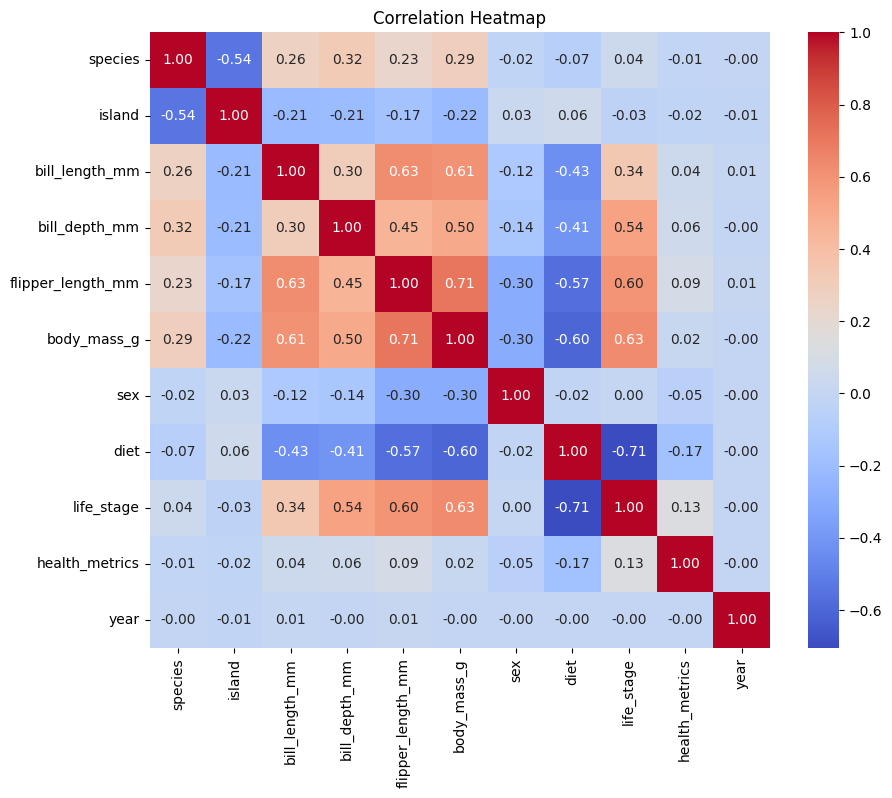

Strong Predictors:
['health_metrics', 'life_stage', 'diet']


In [16]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Correlations of features with health
correlations = training_data.corr()
correlations_with_target = correlations['health_metrics'].sort_values(ascending=False)
print("Correlations with Health Metrics:")
print(correlations_with_target)

# Plot correlations in a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Feature Selection (you can choose your own threshold for strong correlations)
strong_predictors = correlations_with_target[abs(correlations_with_target) > 0.1].index.tolist()
print("Strong Predictors:")
print(strong_predictors)

# Hypothetical Driver Features

###Nutrition Ratio (Nutrition_Ratio): This feature represents the ratio of the penguin's body mass to its primary diet intake. It can be calculated as 'body_mass_g' divided by the sum of 'fish,' 'krill,' and 'squid' intake, normalized to a common scale. A higher nutrition ratio indicates better health, as it implies a balanced diet in relation to body mass.

###Activity Index (Activity_Index): This feature quantifies the penguin's physical activity level based on 'flipper_length_mm' and 'bill_length_mm.' It can be calculated as the product of 'flipper_length_mm' and 'bill_length_mm,' where a higher value represents a more active penguin. Active penguins may have better health due to increased mobility and foraging ability.





**You can write your answers to (4.1) here.**
----
----
Nutrition Ratio (Nutrition_Ratio): This feature represents the ratio of the penguin's body mass to its primary diet intake. It can be calculated as 'body_mass_g' divided by the sum of 'fish,' 'krill,' and 'squid' intake, normalized to a common scale. A higher nutrition ratio indicates better health, as it implies a balanced diet in relation to body mass.

Activity Index (Activity_Index): This feature quantifies the penguin's physical activity level based on 'flipper_length_mm' and 'bill_length_mm.' It can be calculated as the product of 'flipper_length_mm' and 'bill_length_mm,' where a higher value represents a more active penguin. Active penguins may have better health due to increased mobility and foraging ability.

## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Train a Decision Tree Classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_clf.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Hyperparameters: {accuracy}")


Best Hyperparameters:
{'max_depth': None, 'min_samples_split': 10}
Test Accuracy with Best Hyperparameters: 0.8454810495626822


**Add explanation here:**
'max_depth': This hyperparameter controls the maximum depth of the decision tree. A deeper tree can capture more complex patterns in the training data but is more prone to overfitting. We provided a range of values [None, 10, 20, 30] for max_depth.

None: It means there is no maximum depth, and the tree can expand until it contains very few samples in each leaf node.
10, 20, 30: These are values that limit the depth of the tree to 10, 20, or 30 levels, respectively.
We chose to tune this hyperparameter because it helps find the right trade-off between model complexity and underfitting/overfitting.

'min_samples_split': This hyperparameter specifies the minimum number of samples required to split an internal node of the decision tree. A smaller value allows for more splitting, potentially leading to a more complex tree and overfitting. We provided a range of values [2, 5, 10] for min_samples_split.

2: It means a node can split if it has at least 2 samples.
5: It means a node can split if it has at least 5 samples.
10: It means a node can split if it has at least 10 samples.
We chose to tune this hyperparameter because it helps control the granularity of splits in the tree. A smaller value can make the tree more sensitive to noise in the data, while a larger value can make it more robust.


The choice of these hyperparameters is crucial for controlling the complexity of the decision tree model and preventing overfitting. By tuning max_depth and min_samples_split, you aim to find the best combination that provides good predictive accuracy on the test data while avoiding excessive complexity or overfitting. The grid search with cross-validation helps you identify the best hyperparameters based on their impact on model performance.


## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





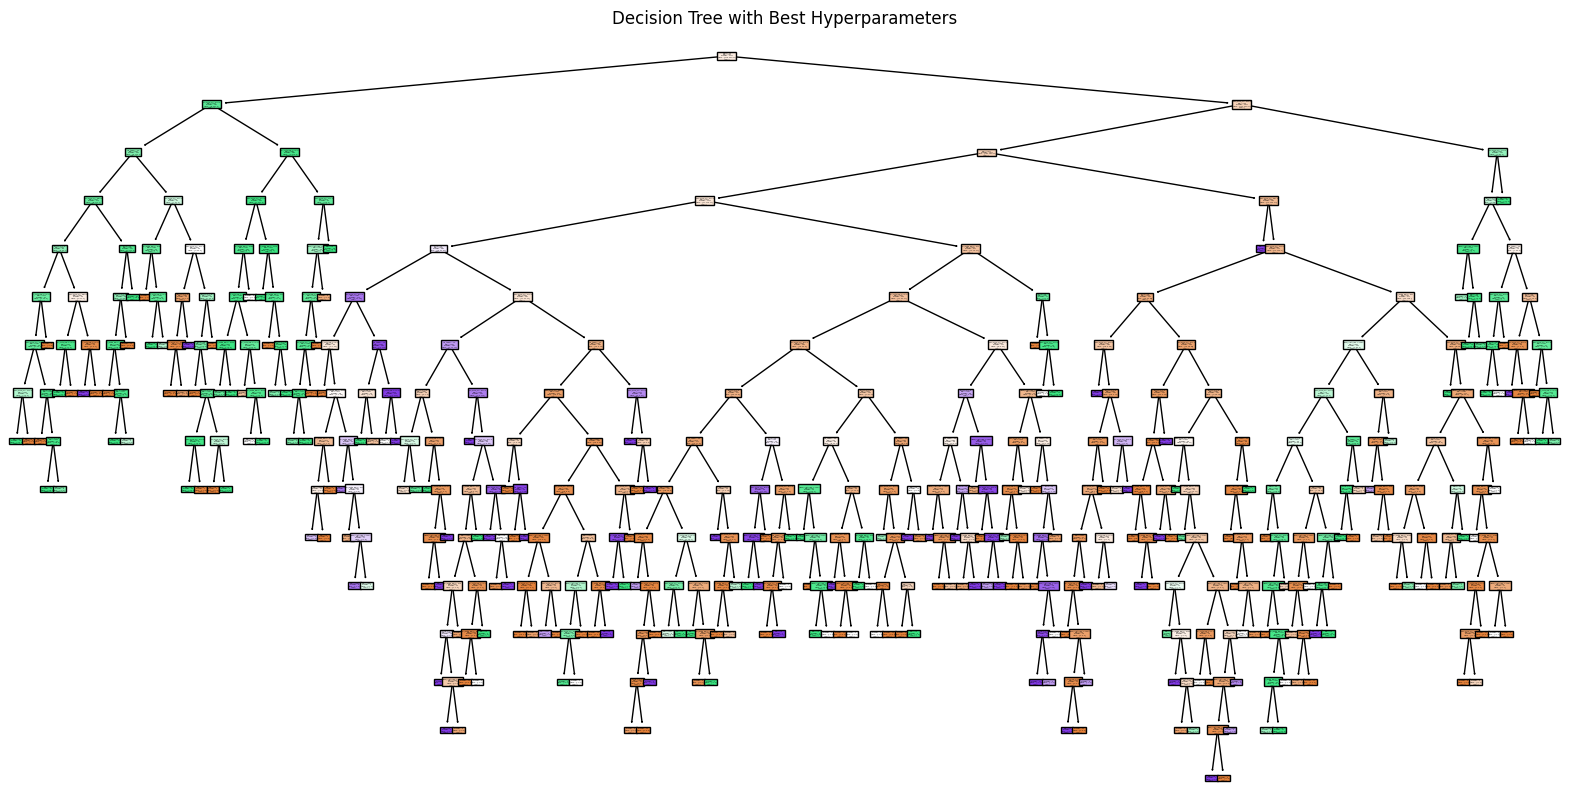

In [18]:
from sklearn.tree import plot_tree

# Re-train the Decision Tree Classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

# Plot the trained decision tree
plt.figure(figsize=(20, 10))  # You can adjust the figsize as needed
plot_tree(best_clf, filled=True, feature_names=X_train.columns, class_names=str(best_clf.classes_))
plt.title("Decision Tree with Best Hyperparameters")
plt.show()


## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.

Hint: You can use the confusion_matrix function from sklearn.metrics



Test Accuracy: 0.8454810495626822


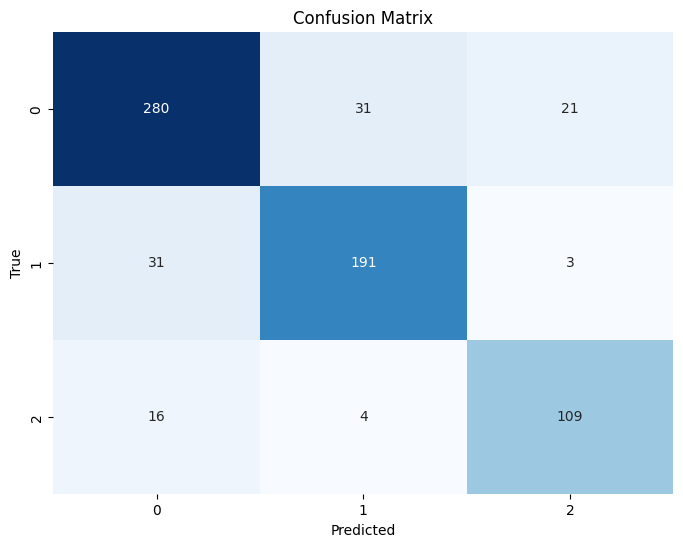

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels of the testing data using the trained classifier
y_pred = best_clf.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


**Fill the blanks:** The model most frequently mistakes class(es) _________ for class(es) _________.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
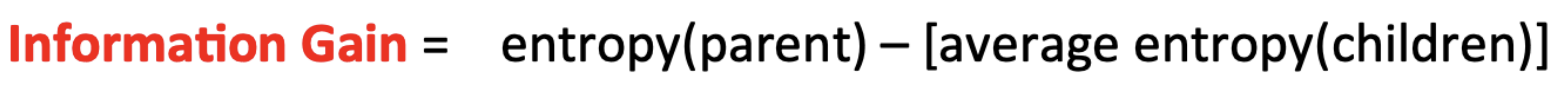



In [20]:
import numpy as np

# Function to calculate entropy
def entropy(class_probabilities):
    return -np.sum(class_probabilities * np.log2(class_probabilities + 1e-10))  # Adding a small epsilon to avoid division by zero

# Calculate the class probabilities of the parent node
total_samples = len(y_train)
class_counts_parent = np.bincount(y_train)
class_probabilities_parent = class_counts_parent / total_samples

# Calculate the entropy of the parent node
entropy_parent = entropy(class_probabilities_parent)

# Define the first split (you need to replace this with the actual split you want to calculate information gain for)
split_feature = 'bill_length_mm'  # Replace 'your_split_feature' with the actual feature you want to split on
split_values = [20, 10]  # Replace with the actual values you want to split on

# Calculate the class probabilities of the children nodes after the first split
class_probabilities_children = []
for value in split_values:
    indices = X_train[split_feature] == value
    class_counts_child = np.bincount(y_train[indices])
    class_probabilities_child = class_counts_child / np.sum(indices)
    class_probabilities_children.append(class_probabilities_child)

# Calculate the entropy of the children nodes
entropy_children = [entropy(class_probabilities_child) for class_probabilities_child in class_probabilities_children]

# Calculate the average entropy of the children nodes
average_entropy_children = np.average(entropy_children, weights=[np.sum(X_train[split_feature] == value) / total_samples for value in split_values])

# Calculate information gain
information_gain = entropy_parent - average_entropy_children

print(f"Information Gain on the first split: {information_gain}")


Information Gain on the first split: 1.524729329830671
